In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
df=pd.read_csv("master.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [0]:
df.dropna(1, inplace=True);

In [7]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [8]:
data_per_year = df.groupby('year').sum();
print(data_per_year)

      suicides_no  population  suicides/100k pop  gdp_per_capita ($)
year                                                                
1985       116063  1008600086            6811.89             3508548
1986       120670  1029909613            6579.84             4104636
1987       126842  1095029726            7545.45             5645760
1988       121026  1054094424            7473.13             5870508
1989       160244  1225514347            8036.54             6068424
1990       193361  1466620100            9878.75             7531260
1991       198020  1489988384           10321.06             7782096
1992       211473  1569539447           10528.88             8195232
1993       221565  1530416654           10790.29             8231796
1994       232063  1548749372           11483.79             9438756
1995       243544  1591559103           14660.26            11858508
1996       246725  1662267662           14142.21            11600736
1997       240745  1702991519     

In [9]:
unique_country = df['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

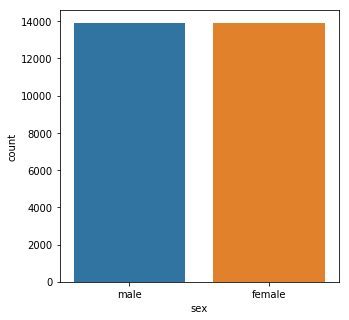

In [10]:
plt.figure(figsize=(5,5))
sex = sns.countplot(x='sex', data=df)

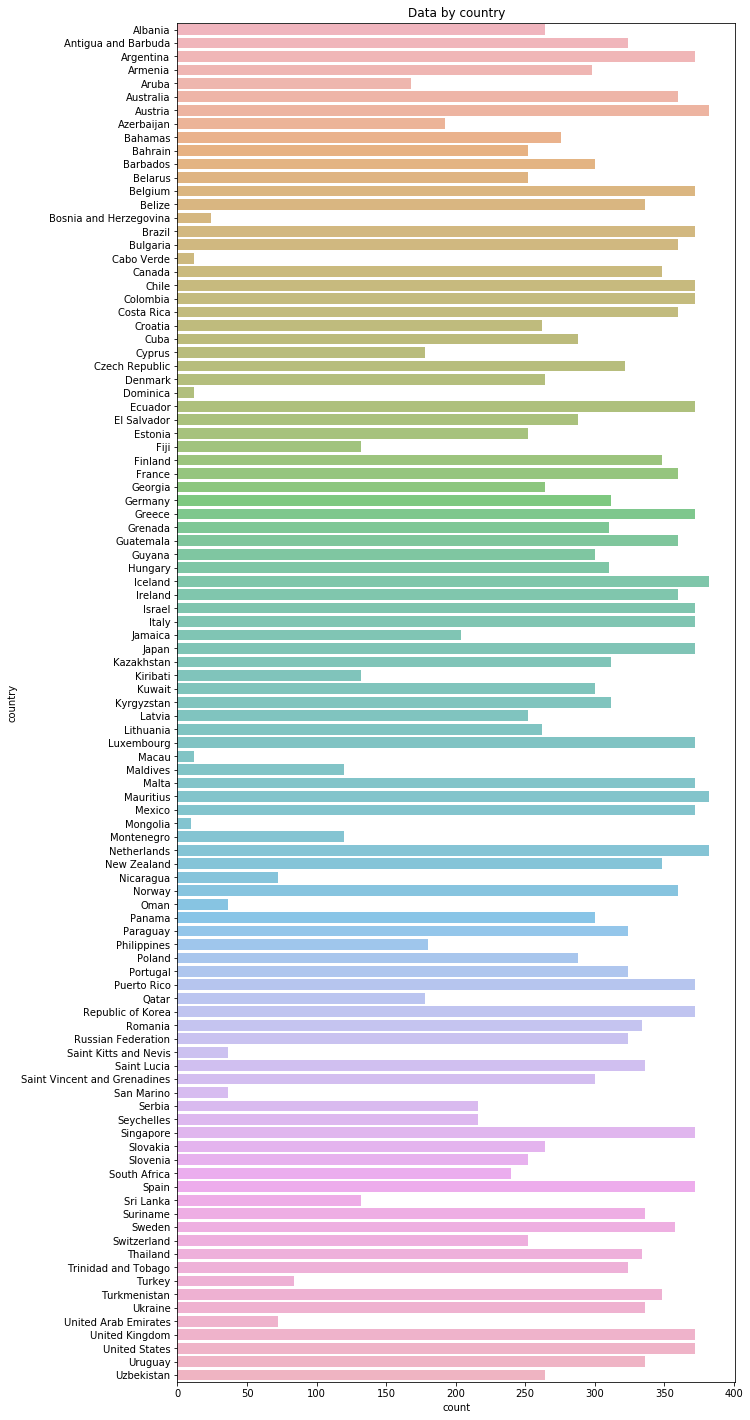

In [11]:
dataset=df
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y ='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

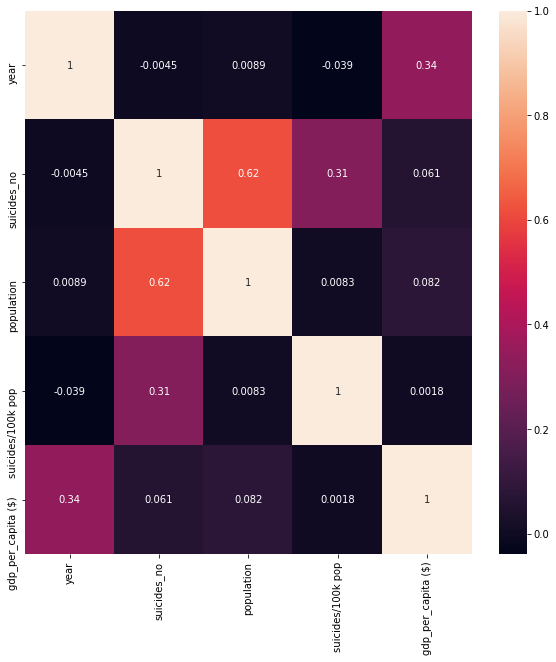

In [12]:
plt.figure(figsize=(10,10))
cor = sns.heatmap(dataset.corr(), annot=True)

In [0]:
a_map = {
'75+ years' : 5,      
'55-74 years' : 4 ,    
'35-54 years' : 3,    
'25-34 years' : 2,    
'15-24 years' : 1,   
'5-14 years':  0     
 }

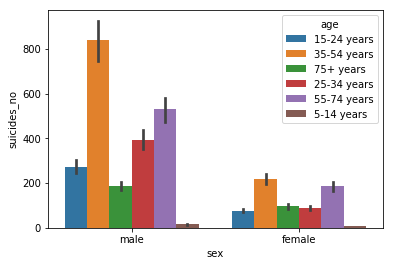

In [14]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in ['country' , 'sex' , 'country-year' ,'generation']:
      df[x] = le.fit_transform(df[x])

        
age = {
'75+ years' : 5,      
'55-74 years' : 4 ,    
'35-54 years' : 3,    
'25-34 years' : 2,    
'15-24 years' : 1,   
'5-14 years':  0     
 }
df['age'] = df['age'].map(age)

In [0]:
df.head()
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(",", "")

# Change string to numbers
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '])

In [0]:
from sklearn.model_selection import train_test_split
y = df[['suicides_no']].values
x = df.drop('suicides_no',axis=1).values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [29]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.3min finished


0.9823235547211525
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
